In [1]:
#!pip install --upgrade matplotlib seaborn

In [1]:
import pandas as pd
from datetime import datetime as dt
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#from imblearn.under_sampling import RandomUnderSampler
import time

In [2]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification

In [3]:
from sklearn.metrics import f1_score

In [4]:
import numpy as np

In [5]:
from imblearn.over_sampling import RandomOverSampler

In [6]:
us_wildfires = pd.read_csv('us_wildfires_filled.csv')

In [7]:
us_wildfires['DISCOVERY_DATE'] = pd.to_datetime(us_wildfires["DISCOVERY_DATE"], format = "%Y-%m-%d")
us_wildfires['CONT_DATE'] = pd.to_datetime(us_wildfires["CONT_DATE"], format = "%Y-%m-%d")

In [8]:
us_wildfires.isna().sum()

OBJECTID                     0
NWCG_REPORTING_AGENCY        0
NWCG_REPORTING_UNIT_ID       0
FIRE_NAME                    0
FIRE_YEAR                    0
DISCOVERY_DATE               0
NWCG_CAUSE_CLASSIFICATION    0
NWCG_GENERAL_CAUSE           0
NWCG_CAUSE_AGE_CATEGORY      0
CONT_DATE                    0
FIRE_SIZE                    0
FIRE_SIZE_CLASS              0
LATITUDE                     0
LONGITUDE                    0
OWNER_DESCR                  0
DURATION                     0
COUNTY                       0
STATE                        0
PRECIPITATION                0
TEMPERATURE                  0
WIND_SPEED                   0
ELEVATION                    0
dtype: int64

In [9]:
to_drop = ['OBJECTID', 'LATITUDE', 'LONGITUDE', 'FIRE_NAME']
model_data = us_wildfires.drop(to_drop, axis=1)

In [10]:
model_data['DAY_OF_WEEK'] = model_data['DISCOVERY_DATE'].dt.dayofweek

In [11]:
model_data['DAY_OF_YEAR'] = model_data['DISCOVERY_DATE'].dt.dayofyear

In [12]:
date_drop = ['DISCOVERY_DATE', 'CONT_DATE']
model_data = model_data.drop(model_data[date_drop], axis=1)

In [13]:
more_drops = ['NWCG_REPORTING_UNIT_ID', 'FIRE_SIZE_CLASS',
             'NWCG_CAUSE_CLASSIFICATION', 'NWCG_CAUSE_AGE_CATEGORY']
model_data = model_data.drop(more_drops, axis=1)

In [14]:
model_data['COUNTY_STATE'] = model_data['COUNTY'] + str(" ") + model_data['STATE']

In [15]:
model_data[['COUNTY_STATE', 'COUNTY', 'STATE']].head()

,COUNTY_STATE,COUNTY,STATE
0,Plumas County CA,Plumas County,CA
1,El Dorado County CA,El Dorado County,CA
2,Placer County CA,Placer County,CA
3,Alpine County CA,Alpine County,CA
4,Alpine County CA,Alpine County,CA


In [16]:
model_data = model_data.drop('COUNTY', axis=1)

In [17]:
model_data.columns.to_list()

['NWCG_REPORTING_AGENCY',
 'FIRE_YEAR',
 'NWCG_GENERAL_CAUSE',
 'FIRE_SIZE',
 'OWNER_DESCR',
 'DURATION',
 'STATE',
 'PRECIPITATION',
 'TEMPERATURE',
 'WIND_SPEED',
 'ELEVATION',
 'DAY_OF_WEEK',
 'DAY_OF_YEAR',
 'COUNTY_STATE']

In [18]:
model_data['COUNTY_STATE'] = model_data['COUNTY_STATE'].astype('category')
model_data['COUNTY_STATE'] = model_data['COUNTY_STATE'].cat.codes.astype(int)

In [19]:
model_data['STATE'] = model_data['STATE'].astype('category')
model_data['STATE'] = model_data['STATE'].cat.codes.astype(int)

In [20]:
model_data = model_data.drop('NWCG_REPORTING_AGENCY', axis=1)

In [21]:
model_data['OWNER_DESCR'] = model_data['OWNER_DESCR'].astype('category')
model_data['OWNER_DESCR'] = model_data['OWNER_DESCR'].cat.codes.astype(int)

In [22]:
model_data['NWCG_GENERAL_CAUSE'] = model_data['NWCG_GENERAL_CAUSE'].replace({'Other causes': 'Undetermined',
                                                                             'Undetermined': 'Undetermined'})

# Random Forest Dataset

data with OWNER_DESCR, NWCG_REPORTING_AGENCY and Undetermined removed

In [23]:
model_data = model_data.drop('OWNER_DESCR', axis=1)

In [25]:
model_data = model_data[model_data['NWCG_GENERAL_CAUSE'] != 'Undetermined']

In [26]:
X = model_data.drop("NWCG_GENERAL_CAUSE", axis=1)
y = model_data["NWCG_GENERAL_CAUSE"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [27]:
X = model_data.drop("NWCG_GENERAL_CAUSE", axis=1)
y = model_data["NWCG_GENERAL_CAUSE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

start_time = time.time()

brf = BalancedRandomForestClassifier()
brf.fit(X_train, y_train)
brf_predictions = brf.predict(X_test)
brf_acc = accuracy_score(y_test, brf_predictions)
brf_f1 = f1_score(y_test, brf_predictions, average='weighted')
print(f"BalancedRandomForest Accuracy Score: {brf_acc}, F1-Score: {brf_f1}")

print("--- %s seconds ---" % round(time.time() - start_time, 2))

C:\Users\Usuario\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForest Accuracy Score: 0.4106334609949413, F1-Score: 0.4423501353977798
--- 30.56 seconds ---


In [28]:
report = classification_report(y_test, brf_predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
Arson,0.457006,0.413259,0.434033,43970.000000
Debris and open burning,0.670172,0.331697,0.443759,81276.000000
Equipment and vehicle use,0.372122,0.221698,0.277858,28214.000000
Firearms and explosives use,0.051002,0.767967,0.095652,487.000000
Fireworks,0.195713,0.668857,0.302818,3044.000000
Misuse of fire by a minor,0.137259,0.322402,0.192544,8691.000000
Natural,0.806940,0.684099,0.740460,46331.000000
Power supply,0.109977,0.443815,0.176274,5829.000000
Railroad operations and maintenance,0.146890,0.477203,0.224634,3904.000000
Recreation and ceremony,0.292103,0.387062,0.332944,13990.000000


In [29]:
feature_importances = pd.DataFrame(
    brf.feature_importances_, 
    index =X_train.columns,  
    columns=['importance']
).sort_values('importance', ascending=False)

feature_importances

,importance
ELEVATION,0.130014
DAY_OF_YEAR,0.127638
COUNTY_STATE,0.119845
TEMPERATURE,0.108236
WIND_SPEED,0.105275
FIRE_YEAR,0.087501
FIRE_SIZE,0.084866
STATE,0.084210
PRECIPITATION,0.075321
DAY_OF_WEEK,0.059658


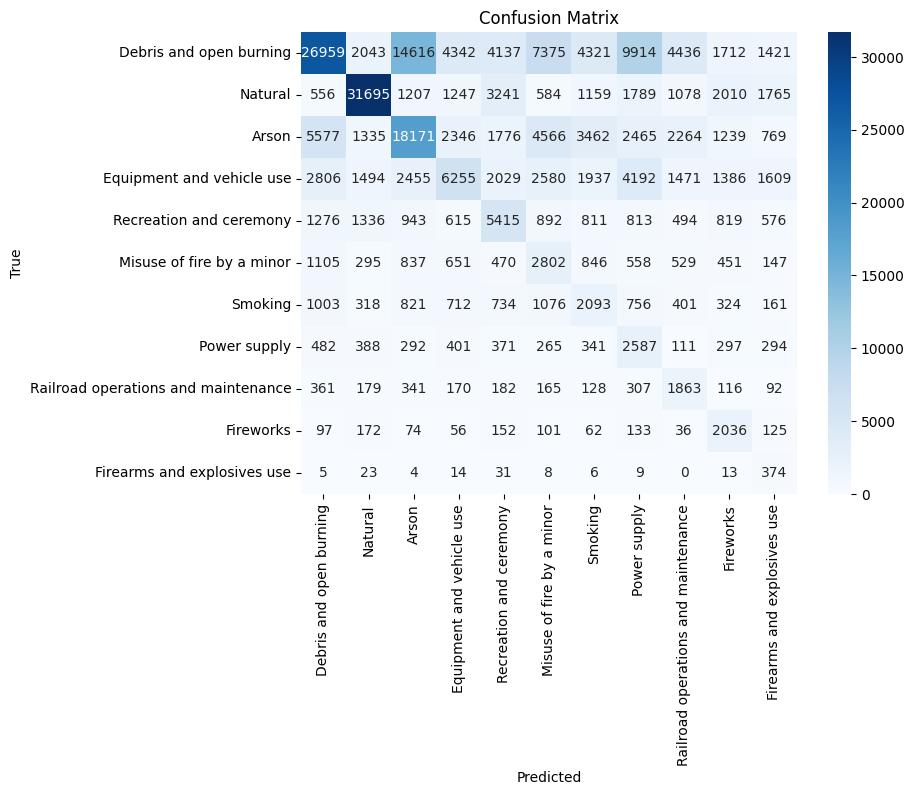

In [30]:
# Make a correlation matrix 
labels = y_test.value_counts().index
cm = confusion_matrix(y_test, brf_predictions, labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Random Forest Dataset 2

Merging classes

In [24]:
# Combining Railroad, Power & Equipment/Vehicle + Smoking & Minor 

data_2 = model_data

data_2['NWCG_GENERAL_CAUSE'] = data_2['NWCG_GENERAL_CAUSE'].replace({'Railroad operations and maintenance': 'Infrastructure-related causes',
                                                                     'Power supply': 'Infrastructure-related causes',
                                                                     'Equipment and vehicle use': 'Infrastructure-related causes',
                                                                     'Smoking': 'Erratic',
                                                                     'Misuse of fire by a minor': 'Erratic'})

# I am going to drop 'firearms & explosives use' as they don't fit exactly
# into another category, and there's so relatively few of them
# data_2 = data_2[data_2['NWCG_GENERAL_CAUSE']!='Firearms and explosives use']

# Combining FIreworks with Recreation & Ceremony
# data_2['NWCG_GENERAL_CAUSE'] = data_2['NWCG_GENERAL_CAUSE'].replace({'Fireworks': 'Recreation and ceremony'})


In [26]:
X2 = data_2.drop("NWCG_GENERAL_CAUSE", axis=1)
y2 = data_2["NWCG_GENERAL_CAUSE"]


X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, shuffle=True, random_state=42)

In [33]:
start_time2 = time.time()

brf2 = BalancedRandomForestClassifier()
brf2.fit(X2_train, y2_train)
brf2_predictions = brf2.predict(X2_test)
brf2_acc = accuracy_score(y2_test, brf2_predictions)
brf2_f1 = f1_score(y2_test, brf2_predictions, average='weighted')
print(f"BalancedRandomForest Accuracy Score: {brf_acc}, F1-Score: {brf_f1}")

print("--- %s seconds ---" % round(time.time() - start_time, 2))

C:\Users\Usuario\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForest Accuracy Score: 0.4106334609949413, F1-Score: 0.4423501353977798
--- 66.81 seconds ---


In [39]:
brf2_acc = accuracy_score(y2_test, brf2_predictions)
brf2_f1 = f1_score(y2_test, brf2_predictions, average='weighted')
print(f"BalancedRandomForest Accuracy Score: {brf2_acc}, F1-Score: {brf2_f1}")

BalancedRandomForest Accuracy Score: 0.46619288508407236, F1-Score: 0.4864703975324804


In [34]:
report2 = classification_report(y2_test, brf2_predictions, output_dict=True)
report2_df = pd.DataFrame(report2).transpose()
report2_df

,precision,recall,f1-score,support
Arson,0.427166,0.460246,0.443089,43970.000000
Debris and open burning,0.639630,0.431763,0.515532,81276.000000
Erratic,0.195382,0.359450,0.253158,17090.000000
Firearms and explosives use,0.046647,0.774127,0.087992,487.000000
Fireworks,0.176792,0.669185,0.279692,3044.000000
Infrastructure-related causes,0.408074,0.299945,0.345753,37947.000000
Natural,0.783592,0.709158,0.744519,46331.000000
Recreation and ceremony,0.270566,0.406719,0.324957,13990.000000
accuracy,0.466193,0.466193,0.466193,0.466193
macro avg,0.368481,0.513824,0.374336,244135.000000


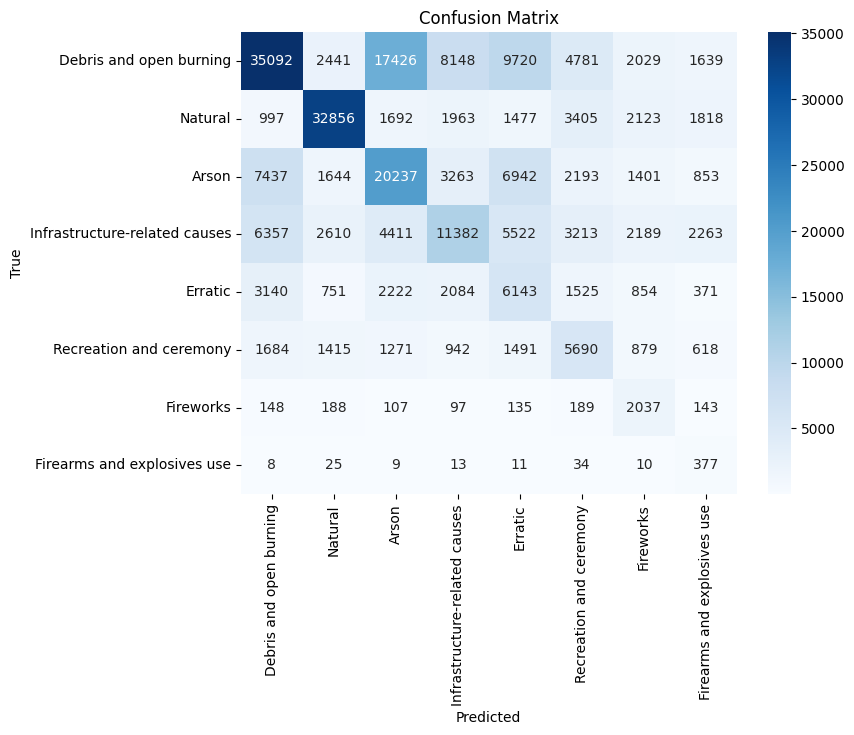

In [35]:
# Make a correlation matrix 
labels2 = y2_test.value_counts().index
cm2 = confusion_matrix(y2_test, brf2_predictions, labels=labels2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, cmap="Blues", fmt="d", xticklabels=labels2, yticklabels=labels2)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [37]:
#trying oversampling

X3_train, X3_test, y3_train, y3_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Perform oversampling on the training data
oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X3_train, y3_train)

# Train BalancedRandomForestClassifier on the resampled data
start_time3 = time.time()
brf3 = BalancedRandomForestClassifier()
brf3.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
brf3_predictions = brf3.predict(X3_test)


print("--- %s seconds ---" % round(time.time() - start_time, 2))

C:\Users\Usuario\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForest Accuracy Score: 0.4106334609949413, F1-Score: 0.4423501353977798
--- 901.53 seconds ---


In [40]:
# Calculate accuracy and F1-score
brf3_acc = accuracy_score(y3_test, brf3_predictions)
brf3_f1 = f1_score(y3_test, brf3_predictions, average='weighted')

print(f"BalancedRandomForest Accuracy Score: {brf3_acc}, F1-Score: {brf3_f1}")

BalancedRandomForest Accuracy Score: 0.5946300202756671, F1-Score: 0.5859988088283893


In [38]:
report3 = classification_report(y3_test, brf3_predictions, output_dict=True)
report3_df = pd.DataFrame(report3).transpose()
report3_df

,precision,recall,f1-score,support
Arson,0.542964,0.526404,0.534556,43970.00000
Debris and open burning,0.617081,0.695298,0.653858,81276.00000
Erratic,0.319808,0.214453,0.256743,17090.00000
Firearms and explosives use,0.720779,0.455852,0.558491,487.00000
Fireworks,0.562906,0.455650,0.503631,3044.00000
Infrastructure-related causes,0.489165,0.444357,0.465685,37947.00000
Natural,0.775248,0.828106,0.800806,46331.00000
Recreation and ceremony,0.426928,0.358113,0.389504,13990.00000
accuracy,0.594630,0.594630,0.594630,0.59463
macro avg,0.556860,0.497279,0.520409,244135.00000


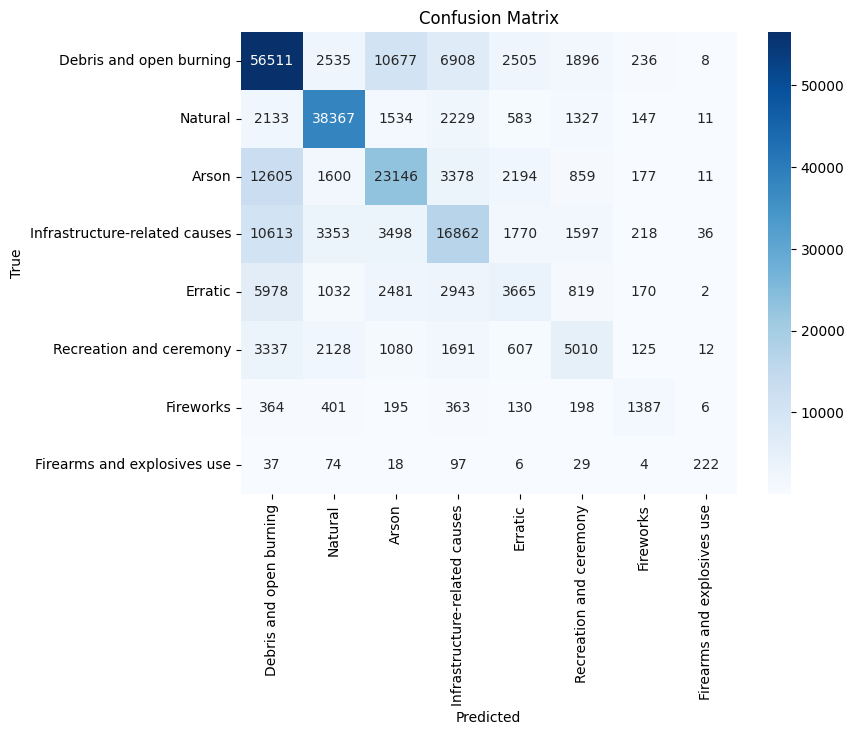

In [41]:
# Make a correlation matrix 
labels3 = y3_test.value_counts().index
cm3 = confusion_matrix(y3_test, brf3_predictions, labels=labels3)

plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, cmap="Blues", fmt="d", xticklabels=labels3, yticklabels=labels3)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [42]:
#dropping erractic as it doesn't seem to have a pattern, just to test

data_4 = data_2[data_2['NWCG_GENERAL_CAUSE'] != 'Erratic']

In [44]:
X4 = data_4.drop("NWCG_GENERAL_CAUSE", axis=1)
y4 = data_4["NWCG_GENERAL_CAUSE"]


X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, shuffle=True, random_state=42)

start_time4 = time.time()

brf4 = BalancedRandomForestClassifier()
brf4.fit(X4_train, y4_train)
brf4_predictions = brf4.predict(X4_test)
brf4_acc = accuracy_score(y4_test, brf4_predictions)
brf4_f1 = f1_score(y4_test, brf4_predictions, average='weighted')
print(f"BalancedRandomForest Accuracy Score: {brf4_acc}, F1-Score: {brf4_f1}")

print("--- %s seconds ---" % round(time.time() - start_time, 2))

C:\Users\Usuario\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForest Accuracy Score: 0.5148001973359645, F1-Score: 0.5329055224671017
--- 3103.31 seconds ---


In [46]:
report4 = classification_report(y4_test, brf4_predictions, output_dict=True)
report4_df = pd.DataFrame(report4).transpose()
report4_df

,precision,recall,f1-score,support
Arson,0.433636,0.528953,0.476575,43847.0000
Debris and open burning,0.667374,0.474623,0.554732,81452.0000
Firearms and explosives use,0.047797,0.741736,0.089806,484.0000
Fireworks,0.178307,0.682357,0.282733,3038.0000
Infrastructure-related causes,0.419296,0.360006,0.387396,37991.0000
Natural,0.790712,0.709582,0.747953,46285.0000
Recreation and ceremony,0.271864,0.435700,0.334814,13927.0000
accuracy,0.514800,0.514800,0.514800,0.5148
macro avg,0.401284,0.561851,0.410573,227024.0000
weighted avg,0.573733,0.514800,0.532906,227024.0000


In [48]:
#trying oversampling

X5_train, X5_test, y5_train, y5_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Perform oversampling on the training data
oversampler = RandomOverSampler()
X_train_resampled2, y_train_resampled2 = oversampler.fit_resample(X5_train, y5_train)

# Train BalancedRandomForestClassifier on the resampled data
start_time5 = time.time()
brf5 = BalancedRandomForestClassifier()
brf5.fit(X_train_resampled2, y_train_resampled2)

# Predict on the test set
brf5_predictions = brf5.predict(X5_test)

brf5_acc = accuracy_score(y5_test, brf5_predictions)
brf5_f1 = f1_score(y5_test, brf5_predictions, average='weighted')
print(f"BalancedRandomForest Accuracy Score: {brf5_acc}, F1-Score: {brf5_f1}")

print("--- %s seconds ---" % round(time.time() - start_time, 2))

C:\Users\Usuario\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForest Accuracy Score: 0.6413815279441821, F1-Score: 0.6367282244680221
--- 4616.37 seconds ---


In [50]:
report5 = classification_report(y5_test, brf5_predictions, output_dict=True)
report5_df = pd.DataFrame(report5).transpose()
report5_df

,precision,recall,f1-score,support
Arson,0.574374,0.555956,0.565015,43847.000000
Debris and open burning,0.660408,0.712469,0.685451,81452.000000
Firearms and explosives use,0.693141,0.396694,0.504599,484.000000
Fireworks,0.595594,0.471692,0.526451,3038.000000
Infrastructure-related causes,0.526917,0.469927,0.496793,37991.000000
Natural,0.789173,0.832430,0.810224,46285.000000
Recreation and ceremony,0.458624,0.372873,0.411327,13927.000000
accuracy,0.641382,0.641382,0.641382,0.641382
macro avg,0.614033,0.544577,0.571409,227024.000000
weighted avg,0.634529,0.641382,0.636728,227024.000000


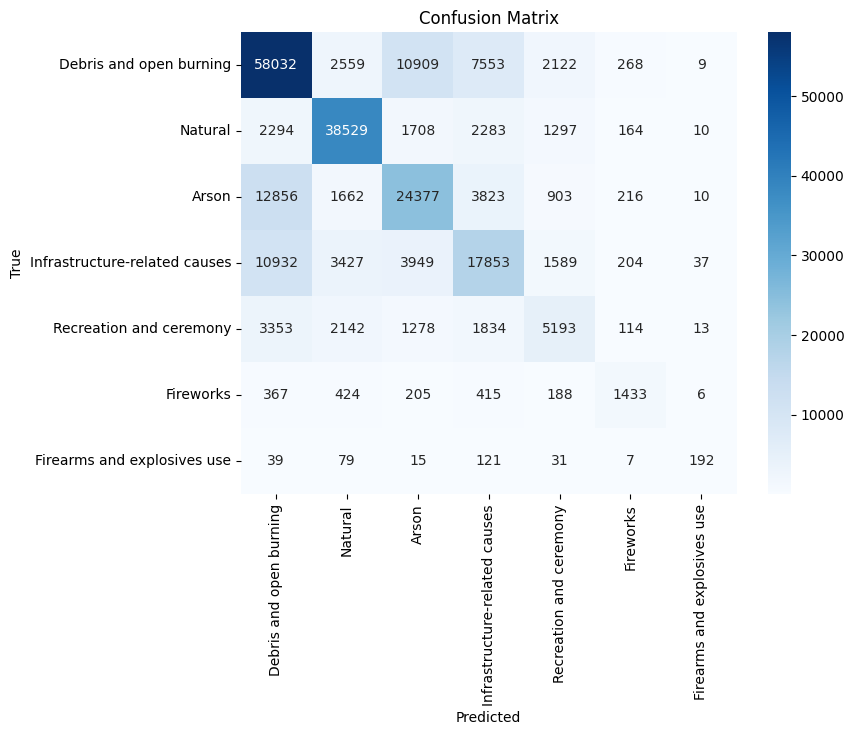

In [51]:
# Make a correlation matrix 
labels5 = y5_test.value_counts().index
cm5 = confusion_matrix(y5_test, brf5_predictions, labels=labels5)

plt.figure(figsize=(8, 6))
sns.heatmap(cm5, annot=True, cmap="Blues", fmt="d", xticklabels=labels5, yticklabels=labels5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [52]:
data_2.to_csv('final_dataset.csv', index=False)

In [6]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [7]:
model_6 = pd.read_csv('final_dataset.csv')

In [8]:
X6 = model_6.drop("NWCG_GENERAL_CAUSE", axis=1)
y6 = model_6["NWCG_GENERAL_CAUSE"]

In [ ]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2, random_state=42)

# Instantiate the classifier
clf = OneVsRestClassifier(SVC())

# Fit the classifier to your dataset
clf.fit(X6_train, y6_train)

# Make predictions on the test set
clf_predictions = clf.predict(X6_test)

# Calculate F1-score
f1 = f1_score(y6_test, clf_predictions, average='weighted')